# Data Analysis Notebook

This notebook is designed for the purpose of analyzing data obtained from the Hydra cluster. It provides a set of tools and techniques for performing data analysis tasks and extracting insights from the data.


In [26]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
include("../AdditionalStructure/NewTypes.jl")
include("../AdditionalStructure/BitStringOps.jl")
include("../AdditionalStructure/Measurements.jl")
include("../AdditionalStructure/MICModels.jl")
include("../AdditionalStructure/ModelRuns.jl")
include("../AdditionalStructure/HelperTools.jl")
include("../AdditionalStructure/Iterators.jl");

exp_index = 1
dir_extension = "_2024-03-01"
filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/test_TEE_exp:$(exp_index).h5"
data = h5read(filename, "/")

for key in keys(data)
    println("$key: $(data[key])")
end


n_t: 20
exp_index: 1
p_f_max: 0.75
TEE: [2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 3.0 3.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 1.0 2.0 2.0 1.0 2.0 3.0 1.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0 1.0 2.0 2.0 3.0 2.0 3.0 2.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 4.0 2.0 2.0 5.0 4.0 2.0 3.0 2.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 1.0 4.0 3.0 2.0 3.0 3.0 3.0 4.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 5.0 3.0 2.0 5.0 3.0 2.0 3.0 1.0 2.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 4.0 4.0 4.0 2.0 2.0 3.0 3.0 2.0 2.0 1.0 2.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 3.0 2.0 2.0 2.0 3.0 1.0 2.0 2.0 2.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 3.0 3.0 3.0 4.0 3.0 1.0 2.0 3.0 2.0 3.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 1.0 3.0 3.0 2.0 3.0 2.0 4.0 4.0 1.0 2.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 1.0 2.0 3.0 3.0 3.0 2.0 2.0 1.0 1.0 1.0 3.0 2.0; 2.0 2.0 2.0 2.0 2.0 2.0 

sys_type: Init_EdgeSquareLattice_KitaevDoNuT
L: 18
t_final: 100000
t_mmt: [1, 2, 3, 6, 11, 21, 38, 70, 127, 234, 428, 785, 1438, 2637, 4833, 8859, 16238, 29764, 54556, 100000]
p_b_max: 0.0
n_pf: 21
p_b_arr: [0.0]
filename: /mnt/users/jovanovic/GitHub/Subsystem-Code-Physics/Remote-Hydra/Toric_Code/toric_code-TEE-FermiBoseCond.jl
n_pb: 1
p_f_arr: [0.0, 0.0375, 0.075, 0.1125, 0.15, 0.1875, 0.225, 0.2625, 0.3, 0.3375, 0.375, 0.4125, 0.45, 0.4875, 0.525, 0.5625, 0.6, 0.6375, 0.675, 0.7125, 0.75]
d: 3


In [20]:
all_data = []
for exp_index in 1:400
    filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/test_TEE_exp:$(exp_index).h5"
    if ispath(filename)
        data = h5read(filename, "/")
        # print(data["L"],",")
        push!(all_data, data)
    end
end
print("data sets read: ",length(all_data))

data sets read: 400

In [21]:
Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 15
        push!(Observables_t_p, data["TEE"][:, :, :])
    end
end
Observables_t_p_15  = cat(dims= 4, Observables_t_p...)

Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 18
        push!(Observables_t_p, data["TEE"][:, :, :])
    end
end
Observables_t_p_18  = cat(dims= 4, Observables_t_p...)

Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 21
        push!(Observables_t_p, data["TEE"][:, :, :])
    end
end
Observables_t_p_21  = cat(dims= 4, Observables_t_p...)

Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 24
        push!(Observables_t_p, data["TEE"][:, :, :])
    end
end
Observables_t_p_24  = cat(dims= 4, Observables_t_p...);

In [22]:
Means_15 = mean(Observables_t_p_15, dims=4) 
Vars_15 = var(Observables_t_p_15, dims=4) 
Error_in_means_15 = std(Observables_t_p_15, dims=4) ./ sqrt(size(Observables_t_p_15, 4)) 
Medians_15 = median(Observables_t_p_15, dims=4)

Means_18 = mean(Observables_t_p_18, dims=4) 
Vars_18 = var(Observables_t_p_18, dims=4) 
Error_in_means_18 = std(Observables_t_p_18, dims=4) ./ sqrt(size(Observables_t_p_18, 4)) 
Medians_18 = median(Observables_t_p_18, dims=4);

Means_21 = mean(Observables_t_p_21, dims=4)
Vars_21 = var(Observables_t_p_21, dims=4)
Error_in_means_21 = std(Observables_t_p_21, dims=4) ./ sqrt(size(Observables_t_p_21, 4))
Medians_21 = median(Observables_t_p_21, dims=4)

Means_24 = mean(Observables_t_p_24, dims=4)
Vars_24 = var(Observables_t_p_24, dims=4)
Error_in_means_24 = std(Observables_t_p_24, dims=4) ./ sqrt(size(Observables_t_p_24, 4))
Medians_24 = median(Observables_t_p_24, dims=4);

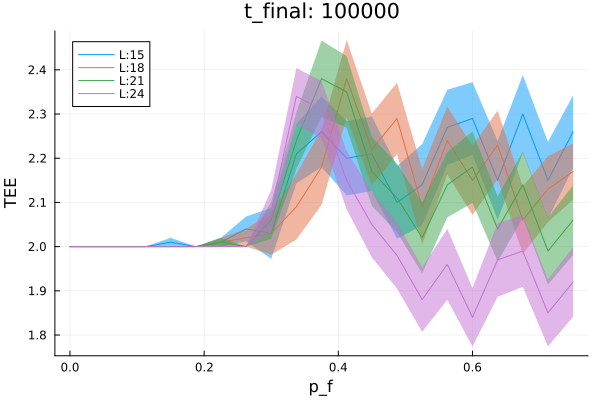

In [23]:
plot(model_data["p_f_arr"], Means_15[end, :, 1], ribbon=Error_in_means_15[end, :, 1], label="L:$(15)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end])", legend=:topleft) 
plot!(model_data["p_f_arr"], Means_18[end, :, 1], ribbon=Error_in_means_18[end, :, 1], label="L:$(18)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end])", legend=:topleft)
plot!(model_data["p_f_arr"], Means_21[end, :, 1], ribbon=Error_in_means_21[end, :, 1], label="L:$(21)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end])", legend=:topleft)
plot!(model_data["p_f_arr"], Means_24[end, :, 1], ribbon=Error_in_means_24[end, :, 1], label="L:$(24)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end])", legend=:topleft)

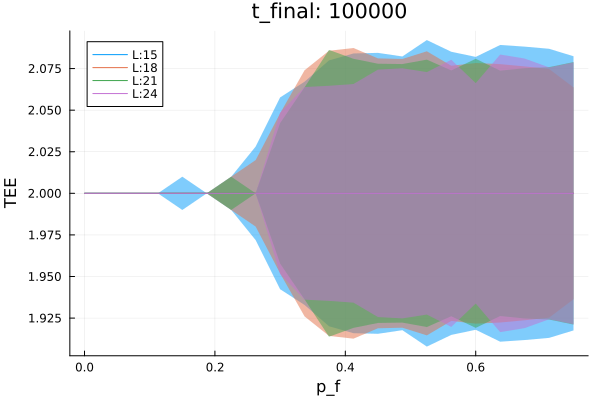

In [24]:
plot(model_data["p_f_arr"], Medians_15[end, :, 1], ribbon=Error_in_means_15[end, :, 1], label="L:$(15)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end])", legend=:topleft) 
plot!(model_data["p_f_arr"], Medians_18[end, :, 1], ribbon=Error_in_means_18[end, :, 1], label="L:$(18)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end])", legend=:topleft)
plot!(model_data["p_f_arr"], Medians_21[end, :, 1], ribbon=Error_in_means_21[end, :, 1], label="L:$(21)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end])", legend=:topleft)
plot!(model_data["p_f_arr"], Medians_24[end, :, 1], ribbon=Error_in_means_24[end, :, 1], label="L:$(24)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end])", legend=:topleft)

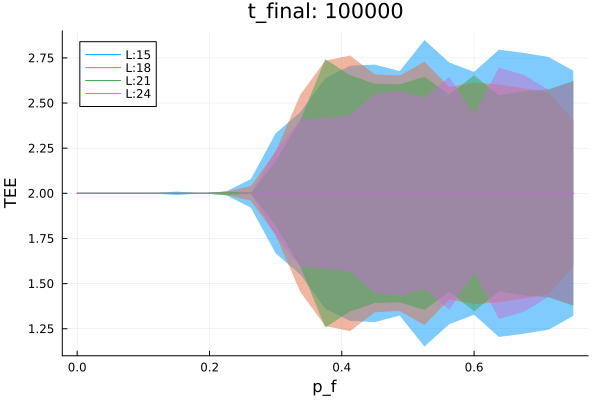

In [25]:
plot(model_data["p_f_arr"], Medians_15[end, :, 1], ribbon=Vars_15[end, :, 1], label="L:$(15)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end])", legend=:topleft) 
plot!(model_data["p_f_arr"], Medians_18[end, :, 1], ribbon=Vars_18[end, :, 1], label="L:$(18)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end])", legend=:topleft)
plot!(model_data["p_f_arr"], Medians_21[end, :, 1], ribbon=Vars_21[end, :, 1], label="L:$(21)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end])", legend=:topleft)
plot!(model_data["p_f_arr"], Medians_24[end, :, 1], ribbon=Vars_24[end, :, 1], label="L:$(24)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end])", legend=:topleft)